In [52]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import pickle
from pickle import load

In [53]:
# Created a list to append all tweet attributes(data)
attributes_container = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:Testy98962010').get_items()):
    if i>=100:
        break
    attributes_container.append([tweet.date, tweet.likeCount, tweet.sourceLabel, tweet.content])
    
# Creating a dataframe from the tweets list above 
tweets_df = pd.DataFrame(attributes_container, columns=["Date Created", "Number of Likes", "Source of Tweet", "Tweets"])

In [54]:
tweets_df.describe

<bound method NDFrame.describe of                Date Created  Number of Likes  Source of Tweet  \
0 2022-12-04 10:42:22+00:00                0  Twitter Web App   
1 2022-12-04 10:36:46+00:00                0  Twitter Web App   

                      Tweets  
0                 It worked!  
1  Hi, This is test number 1  >

In [55]:
a=pd.to_datetime(tweets_df['Date Created'])
a

0   2022-12-04 10:42:22+00:00
1   2022-12-04 10:36:46+00:00
Name: Date Created, dtype: datetime64[ns, UTC]

In [56]:
tweets_df

,Date Created,Number of Likes,Source of Tweet,Tweets
0,2022-12-04 10:42:22+00:00,0,Twitter Web App,It worked!
1,2022-12-04 10:36:46+00:00,0,Twitter Web App,"Hi, This is test number 1"


<AxesSubplot: xlabel='Date Created'>

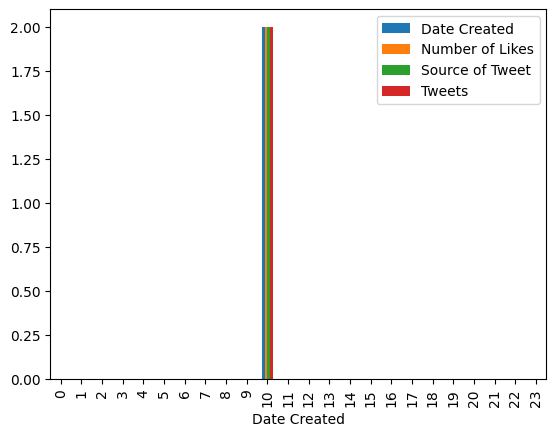

In [57]:
res = tweets_df.groupby(tweets_df["Date Created"].dt.hour).count().reindex(np.arange(24), fill_value=0)
res.plot(kind="bar")


# IMPORT MODEL AND SCALER

In [58]:
model = tf.keras.models.load_model('model.h5')
vectorizer = load(open('tokenizer.pkl', 'rb'))
 

In [59]:
TweetsToProcess=tweets_df['Tweets']

# Predict Tweets and add them to the dataframe

In [60]:
 #Apply scaler to data
x_test = pad_sequences(vectorizer.texts_to_sequences(TweetsToProcess), maxlen=300)

In [61]:
score = model.predict(x_test)

1/1 [==============================] - 0s 270ms/step


In [62]:
score

array([[0.30913222],
       [0.00379089]], dtype=float32)

In [63]:
tweets_df["Predictions_Percentange"]=score

### If percentange is bigger than or equal to 0.5 then we can classify this tweet as a depressing one
### Rule of thumb the closer to 1 it gets the more depressing it is

In [64]:
tweets_df

,Date Created,Number of Likes,Source of Tweet,Tweets,Predictions_Percentange
0,2022-12-04 10:42:22+00:00,0,Twitter Web App,It worked!,0.309132
1,2022-12-04 10:36:46+00:00,0,Twitter Web App,"Hi, This is test number 1",0.003791


In [65]:
tweets_df["Predictions"]=np.where(tweets_df['Predictions_Percentange']>=0.5, "Depression", "Non-Depression")


In [66]:
tweets_df

,Date Created,Number of Likes,Source of Tweet,Tweets,Predictions_Percentange,Predictions
0,2022-12-04 10:42:22+00:00,0,Twitter Web App,It worked!,0.309132,Non-Depression
1,2022-12-04 10:36:46+00:00,0,Twitter Web App,"Hi, This is test number 1",0.003791,Non-Depression
